In [1]:
import math
import matplotlib.pyplot as plt

In [35]:
file_names_old = ["2017-02", "2017-03", "2017-04", "2017-05",
              "2017-06", "2017-07", "2017-08", "2017-09",
              "2017-10", "2017-11", "2017-12", 
              "2018-01", "2018-02", "2018-03", "2018-04",
              "2018-05", "2018-06", "2018-07", "2018-08",
              "2018-09", "2018-10", "2018-11", "2018-12",
              "2019-01", "2019-02", "2019-03", "2019-04",
              "2019-05", "2019-06", "2019-07", "2019-08",
              "2019-09", "2019-10", "2019-11", "2019-12",
              "2020-01", "2020-02", "2020-03", "2020-04",
              "2020-05", "2020-06"]

file_names_new = ["2020-07", "2020-08", "2020-09", "2020-10", 
                  "2020-11", "2020-12", "2021-01", "2021-02", 
                  "2021-03", "2021-04", "2021-05", "2021-06",
                  "2021-07", "2021-08", "2021-09", "2021-10", 
                  "2021-11", "2021-12", "2022-01", "2022-02", 
                  "2022-03", "2022-04", "2022-05", "2022-06", 
                  "2022-07", "2022-08", "2022-09", "2022-10",
                  "2022-11", "2022-12", "2023-01", "2023-02",
                  "2023-03", "2023-04", "2023-05", "2023-06",
                  "2023-07", "2023-08", "2023-09", "2023-10",
                  "2023-11", "2023-12", "2024-01", "2024-02",
                  "2024-03", "2024-04", "2024-05"
                  ]

averageWorkingHours_perMonth = {}
GLZLevel_perMonth = {}

In [43]:
# get average working hours
# old format

for name in file_names_old:
    file = open("MonthlySummaries_oldTimeManagement_BoTime\\" + name + ".txt", "r")
    # print(name)

    line_indicator = ["Mo ", "Di ", "Mi ", "Do ", "Fr "]
    ignore_line = ["Urlaub", "GLZ", "Feiertag"]

    working_days_month = 0

    minutes_sum = 0

    hours_month = 0
    minutes_month = 0

    for line in file:
        if line[0:3] in line_indicator:

            cond_1 = ignore_line[0] in line
            cond_2 = ignore_line[1] in line
            cond_3 = ignore_line[2] in line

            if not(cond_1 or cond_2 or cond_3):
                #print(line)
                idx = line.find("h")
                hour = int(line[idx-2:idx])
                minute = int(line[idx+1:idx+3])
                minutes_sum = minutes_sum + hour*60 + minute
                working_days_month += 1

    hours_month = math.floor(minutes_sum / 60)
    minutes_month = minutes_sum - hours_month * 60

    hours_month = round(hours_month + minutes_month/60, 2)

    averageWorkingHours_perMonth[name] = hours_month/working_days_month


In [37]:
# get average working hours
# new format

for name in file_names_new:
    file = open("MonthlySummaries\\" + name.replace("-", "") + ".txt", "r")
    print(name)

    line_indicator = ["MO ", "DI ", "MI ", "DO ", "FR "] 
    ignore_line = ["Urlaub", "GLZ", "Abbau Zeitkonto", "Feiertag", "tag", "Heilige", "Frei", "Tag der dt. Einheit"]
    
    hours_month = 0
    dayCounter = 0
    for line in file:
        if line[3:6] in line_indicator and (line.find("8001") >= 0 or line.find("7201")) and not any(x in line for x in ignore_line):
            dayCounter += 1
            lineContent = line.split()
            
            searching = True
            element = 3
            while(searching):
                if lineContent[element].find(".") >= 0:
                    searching = False
                    hours_month += float(lineContent[element]) 
                else:
                    element += 1
            

    averageWorkingHours_perMonth[name] = hours_month/dayCounter


2020-07
2020-08
2020-09
2020-10
2020-11
2020-12
2021-01
2021-02
2021-03
2021-04
2021-05
2021-06
2021-07
2021-08
2021-09
2021-10
2021-11
2021-12
2022-01
2022-02
2022-03
2022-04
2022-05
2022-06
2022-07
2022-08
2022-09
2022-10
2022-11
2022-12
2023-01
2023-02
2023-03
2023-04
2023-05
2023-06
2023-07
2023-08
2023-09
2023-10
2023-11
2023-12
2024-01
2024-02
2024-03
2024-04
2024-05


In [38]:
for name in file_names_old:
    file = open("MonthlySummaries_oldTimeManagement_BoTime\\" + name + ".txt", "r")
    
    found_GLZLine = False
    
    for line in file:
        if found_GLZLine:
            lineContent = line.split()
            extracted_GLZ = lineContent[3][0:3]
            if extracted_GLZ[1] == 'h':
                extracted_GLZ = extracted_GLZ[-1]
            extracted_GLZ = extracted_GLZ.replace("h", "")
                
            GLZLevel_perMonth[name] = int(extracted_GLZ)
            found_GLZLine = False
    
        if line.find("GLZ-Summe") >= 0:
            found_GLZLine = True


In [39]:
for name in file_names_new:
    file = open("MonthlySummaries\\" + name.replace("-", "") + ".txt", "r")
    print(name)
    
    for line in file:
        if line.find("Endbestand laufender Monat") >= 0:
            lineContent = line.split()
            GLZLevel_perMonth[name] = int(round(float(lineContent[3])))
            
GLZLevel_perMonth

2020-07
2020-08
2020-09
2020-10
2020-11
2020-12
2021-01
2021-02
2021-03
2021-04
2021-05
2021-06
2021-07
2021-08
2021-09
2021-10
2021-11
2021-12
2022-01
2022-02
2022-03
2022-04
2022-05
2022-06
2022-07
2022-08
2022-09
2022-10
2022-11
2022-12
2023-01
2023-02
2023-03
2023-04
2023-05
2023-06
2023-07
2023-08
2023-09
2023-10
2023-11
2023-12
2024-01
2024-02
2024-03
2024-04
2024-05


{'2017-02': 5,
 '2017-03': 15,
 '2017-04': 21,
 '2017-05': 35,
 '2017-06': 25,
 '2017-07': 21,
 '2017-08': 36,
 '2017-09': 37,
 '2017-10': 40,
 '2017-11': 42,
 '2017-12': 53,
 '2018-01': 19,
 '2018-02': 18,
 '2018-03': 28,
 '2018-04': 38,
 '2018-05': 38,
 '2018-06': 54,
 '2018-07': 81,
 '2018-08': 93,
 '2018-09': 79,
 '2018-10': 78,
 '2018-11': 73,
 '2018-12': 46,
 '2019-01': 48,
 '2019-02': 72,
 '2019-03': 98,
 '2019-04': 97,
 '2019-05': 147,
 '2019-06': 120,
 '2019-07': 77,
 '2019-08': 71,
 '2019-09': 55,
 '2019-10': 47,
 '2019-11': 56,
 '2019-12': 34,
 '2020-01': 44,
 '2020-02': 58,
 '2020-03': 66,
 '2020-04': 65,
 '2020-05': 64,
 '2020-06': 64,
 '2020-07': 63,
 '2020-08': 58,
 '2020-09': 57,
 '2020-10': 54,
 '2020-11': 40,
 '2020-12': -1,
 '2021-01': 5,
 '2021-02': 19,
 '2021-03': 30,
 '2021-04': 34,
 '2021-05': 36,
 '2021-06': 36,
 '2021-07': 49,
 '2021-08': 57,
 '2021-09': 79,
 '2021-10': 79,
 '2021-11': 83,
 '2021-12': 66,
 '2022-01': 48,
 '2022-02': 57,
 '2022-03': 78,
 '2022-0

In [40]:
x_ticks_labels = list(averageWorkingHours_perMonth.keys())
len(x_ticks_labels)

88

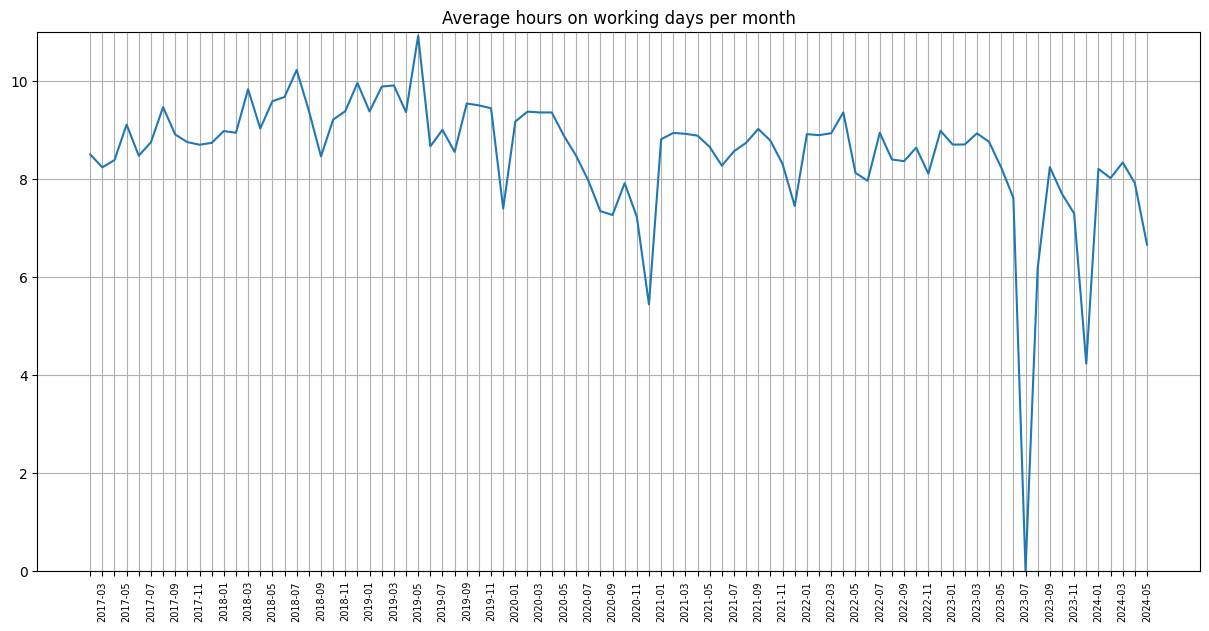

In [41]:
fig, ax = plt.subplots(1,1) 

plt.rcParams["figure.figsize"] = (15,7)
plt.plot(list(averageWorkingHours_perMonth.values()))

ax.set_ylim([0,11])

x_ticks_labels = list(averageWorkingHours_perMonth.keys())

plt.xticks(range(len(x_ticks_labels)), x_ticks_labels, rotation='vertical', fontsize=7)
plt.title("Average hours on working days per month")
# hide every second xtick
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

plt.grid()
plt.show()

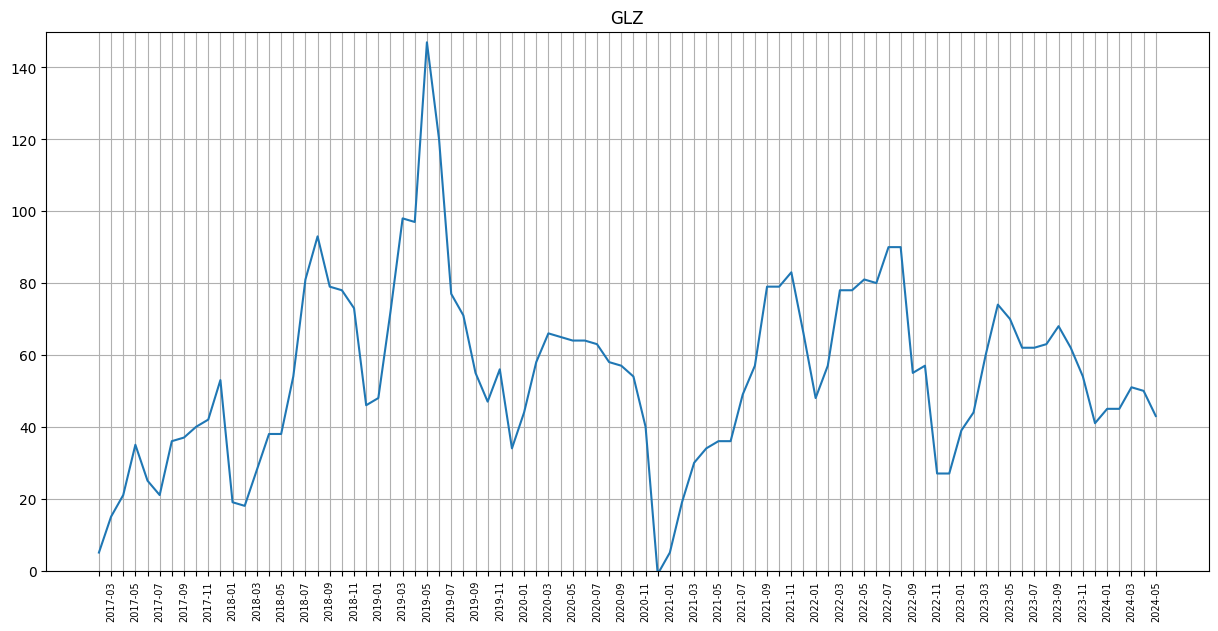

In [42]:
fig, ax = plt.subplots(1,1) 

plt.plot(list(GLZLevel_perMonth.values()))

ax.set_ylim([0,150])

x_ticks_labels = list(GLZLevel_perMonth.keys())

plt.xticks(range(len(x_ticks_labels)), x_ticks_labels, rotation='vertical', fontsize=7)
plt.title("GLZ")
# hide every second xtick
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

plt.grid()
plt.show()